In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# FASE I
### 2. LIMPIEZA DE DATOS

In [3]:
# cargar el ARCHIVO 1 Analisis de vuelos de los clientes fidelizados
# vamos a mostrar las 5 primeras filas del DataFrame

df = pd.read_csv("Customer Flight Activity copy.csv")
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'Customer Flight Activity copy.csv'

**¿Qué es lo que vemos aquí?**

Entendamos los resultados de algunas de las columnas, por ejemplo "Total Flights" lo que es lo mismo, número de vuelos que los clientes han realizado: 

- `count`: Aquí podemos observar que la columna no tiene nulos (en realidad ninguna columna) porque el número de datos conincide con el número de filas.

- `mean`: La media de del numero de vuelos por cliente.

- `std`: La desviación estándar, que mide la dispersión del número de vuelos.

- `min`: el número de vuelos mínimos en el conjunto de datos.

- `25%`: El percentil 25, que representa el valor por debajo del cual se encuentra el 25% de el número de vuelos mínimos realizados que es cero.

- `50%`: La mediana o percentil 50, que es el valor que divide el conjunto de datos en dos mitades iguales.

- `75%`: El percentil 75, que representa el valor por debajo del cual se encuentra el 75% del número de vuelos.

- `max`: El número de vuelos máximos por cliente en el conjunto de datos.

* * REVISAMOS LA COLUMNA "Flights Booked" y tomo decisiones

In [5]:
# Tras la revisión de los datos en la FASE I parte 1 EDA voy a pasar a realizar lo siguiente
valores_vuelos = df['Flights Booked'].unique().tolist()
print(valores_vuelos)

[3, 10, 6, 0, 8, 11, 9, 4, 7, 5, 2, 1, 12, 13, 14, 16, 15, 17, 18, 19, 20, 21]


In [78]:
# voy a mirar cual es el valor mas bajo y el mas alto de el total de vuelos de este modo sabremos que cantidad de vuelos minimo 
# hace una persona socia al mes y que cantidad máxima
vuelos_minimos_no_cero = df[df['Flights Booked'] > 0]['Flights Booked'].min()
vuelos_maximos = df['Flights Booked'].max()
print (f"El valor más bajo de la columna cuyo valor es distinto a cero 'Flights Booked':{vuelos_minimos_no_cero}")
print (f"El valor más bajo de la columna 'Flights Booked':{vuelos_maximos}")

El valor más bajo de la columna cuyo valor es distinto a cero 'Flights Booked':1
El valor más bajo de la columna 'Flights Booked':21


In [79]:
cuento_vuelos_cero = (df['Flights Booked'] == 0).sum()
print (f"Cantidad de Valores 0 en la columna'Flights Booked': {cuento_vuelos_cero}")

Cantidad de Valores 0 en la columna'Flights Booked': 197992


In [80]:
# pueden ser filas que tienen los mismos valores en todas las columnas, es decir, 
# por ejemplo los clientes que no han hecho ningun vuelo que sean cero no nos aporta ningun valor en esta tabla
rows_duplicadas = df.duplicated().sum()
print (f"Cantidad de filas duplicas:{rows_duplicadas}")

Cantidad de filas duplicas:1864


In [81]:
# voy a eliminar las filas en las que el valor "Flights booked" es igual a cero

df = df[df['Flights Booked'] !=0]

# Comprobamos que se ha hecho correcto 

In [82]:
# el el analisis primero exploratorio teniamos
# 405624 filas y 10 columnas
# recordamos que Cantidad de Valores 0 en la columna'Flights Booked': 197992
df.shape

(207632, 10)

In [83]:
##COMPROBAMOS QUE ESTA CORRECTO
#cantidad de filas iniciales
filas_iniciales = 405624
#cantidad de valores 0 en la columna "Flights Booked"
valores_cero = 197992
# cantidad de filas que me quedarian des pues de eliminar las que tienen valor cero
filas_actuales_despues_de_limpiar = filas_iniciales - valores_cero

print (f"Despues de eliminar las filas de valor cero en la columna 'Flights Booked' deberian quedar: {filas_actuales_despues_de_limpiar} filas ")

Despues de eliminar las filas de valor cero en la columna 'Flights Booked' deberian quedar: 207632 filas 


In [84]:
# Este método es para sacar los principales estadísticos del DataFrame sólo variables numéricas
# este método nos da una visión general de la distribución y la caracteristica de los datos
# Esto nos viene bien para una visión global y para la FASE II de la evaluación
df.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,207632.000000,207632.000000,207632.000000,207632.000000,207632.000000,207632.000000,207632.000000,207632.000000,207632.000000,207632.000000
mean,549240.808411,2017.536295,6.641394,8.039050,2.015706,10.054756,2361.633876,241.642600,59.968540,4.853655
std,258456.999580,0.498682,3.448752,4.668948,2.538359,5.807808,1135.835170,116.118272,170.314671,13.775511
min,100018.000000,2017.000000,1.000000,1.000000,0.000000,1.000000,90.000000,9.000000,0.000000,0.000000
25%,326707.000000,2017.000000,4.000000,4.000000,0.000000,6.000000,1458.000000,149.000000,0.000000,0.000000
50%,549612.000000,2018.000000,7.000000,8.000000,1.000000,10.000000,2298.000000,235.000000,0.000000,0.000000
75%,772019.000000,2018.000000,10.000000,11.000000,4.000000,14.000000,3150.000000,323.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [85]:
# Esto nos viene bien para una visión global y para la FASE II de la evaluación
# podemos usar un método que nos transpone los resultados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,207632.0,549240.808411,258456.999580,100018.0,326707.0,549612.0,772019.0,999986.0
Year,207632.0,2017.536295,0.498682,2017.0,2017.0,2018.0,2018.0,2018.0
Month,207632.0,6.641394,3.448752,1.0,4.0,7.0,10.0,12.0
Flights Booked,207632.0,8.039050,4.668948,1.0,4.0,8.0,11.0,21.0
Flights with Companions,207632.0,2.015706,2.538359,0.0,0.0,1.0,4.0,11.0
Total Flights,207632.0,10.054756,5.807808,1.0,6.0,10.0,14.0,32.0
Distance,207632.0,2361.633876,1135.835170,90.0,1458.0,2298.0,3150.0,6293.0
Points Accumulated,207632.0,241.642600,116.118272,9.0,149.0,235.0,323.0,676.5
Points Redeemed,207632.0,59.968540,170.314671,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,207632.0,4.853655,13.775511,0.0,0.0,0.0,0.0,71.0


**¿Qué es lo que vemos aquí?**

Entendamos los resultados de algunas de las columnas, por ejemplo "Flights Booked" lo que es lo mismo, número total de vuelos reservados por el cliente en un mes específico:

- `count`: Aquí podemos observar que la columna no tiene nulos (en realidad ninguna columna) porque el número de datos conincide con el número de filas.

- `mean`: La media de del numero de vuelos reservados por cliente.

- `std`: La desviación estándar, que mide la dispersión del número de vuelos.

- `min`: el número de vuelos mínimos en el conjunto de datos.

- `25%`: El percentil 25, que representa el valor por debajo del cual se encuentra el 25% de el número de vuelos reservados.El valor mínimo es 1 ya que eliminamos los que tenían valor 0.

- `50%`: La mediana o percentil 50, que es el valor que divide el conjunto de datos en dos mitades iguales.

- `75%`: El percentil 75, que representa el valor por debajo del cual se encuentra el 75% del número de vuelos reservados.

- `max`: El número máximo de vuelos reservados por cliente en el conjunto de datos.

In [86]:
df['Year'].value_counts()

2018    111352
2017     96280
Name: Year, dtype: int64

In [87]:
# voy a probar como ver la cantidad de vuelos reservados por año y por mes 
reservas_por_año_al_mes = df.groupby(['Year','Month'])['Flights Booked'].sum().reset_index()

# Compruebo los primeros resultados para verificar 
print(reservas_por_año_al_mes.head(24))

    Year  Month  Flights Booked
0   2017      1           47766
1   2017      2           47691
2   2017      3           64271
3   2017      4           55720
4   2017      5           65279
5   2017      6           80493
6   2017      7           89288
7   2017      8           78692
8   2017      9           63304
9   2017     10           60351
10  2017     11           56905
11  2017     12           77650
12  2018      1           49170
13  2018      2           48643
14  2018      3           66928
15  2018      4           56791
16  2018      5           76891
17  2018      6           92749
18  2018      7          104143
19  2018      8           90512
20  2018      9           73075
21  2018     10           69110
22  2018     11           65345
23  2018     12           88397


In [88]:
# me gustaría hacer una tabla mas visual he investigado y me han dado el siguiente método lo voy a probar 
# con este metodo tabla dinámica (pivot table) con 'Year' como filas, 'Month' como columnas, y 
# la suma de 'Flights Booked' como valores
tabla_para_comparar = df.pivot_table(values='Flights Booked', index='Year', columns='Month', aggfunc='sum')

# Mostrar el resultado
print(tabla_para_comparar)


Month     1      2      3      4      5      6       7      8      9      10  \
Year                                                                           
2017   47766  47691  64271  55720  65279  80493   89288  78692  63304  60351   
2018   49170  48643  66928  56791  76891  92749  104143  90512  73075  69110   

Month     11     12  
Year                 
2017   56905  77650  
2018   65345  88397  


# FASE II:VISUALIZACIÓN
### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

## BOSPLOT o *Diagrama de cajas*

Muestra la distribución y valores atípicos de una variable númerica 

VAMOS A HACER UNA VISUALIZACIÓN POR MÉTODO MATPLOTLIB:
```python
plt.bar(x, y, data, hue, pallete, color="blue", edgecolor="black") 
```
En esta gráfica vamos a contestar a la pregunta que nos hemos planteado
 ¿cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
 usaremos "Year" "Month" "Flights Booked". 
 El Diagrama de cajas mostraría la distribución por meses en un año en el DataFrame, lo que permitiría obtener información sobre la dispersión y la forma de distribución.


In [89]:
# Crear un conjunto de datos para el 2017 y otro para el 2018
df_2017 = reservas_por_año_al_mes[reservas_por_año_al_mes['Year'] == 2017]
df_2018 = reservas_por_año_al_mes[reservas_por_año_al_mes['Year'] == 2018]


In [90]:
# voy a usar un Barplot que muestra la relación entre una variable categórica y una variable númerica mediante barras
# para que quede más clara la visualización voy a transformar la columna "Month" en una variable "objet" al numero le voy 
# añadir el nombre correspondiente usare un diccionario
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
# vamos a transformar (mapear)los numeros en nombre de los meses 
df_2017['Month'] = df_2017['Month'].map (meses)
df_2018['Month'] = df_2018['Month'].map (meses)

<BarContainer object of 12 artists>

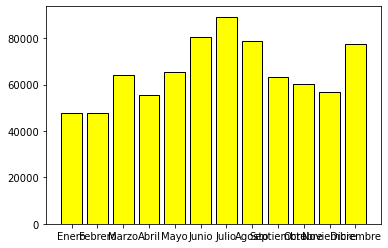

In [91]:
# aplico la formula para comprobar que está bien construida
plt.bar(df_2017['Month'], df_2017['Flights Booked'], color="yellow", edgecolor="black")

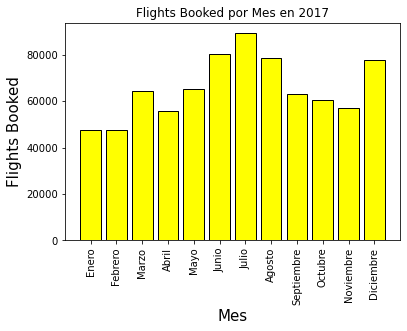

In [92]:
# Creo un gráfico de barras para el 2017
plt.bar(df_2017['Month'], df_2017['Flights Booked'], color="yellow", edgecolor="black")

# Añado las etiquetas del eje x y el y, título del gráfico y colores 
plt.xlabel('Mes', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Flights Booked', fontsize=15)
plt.title('Flights Booked por Mes en 2017')

# Mostrar el gráfico
plt.show()


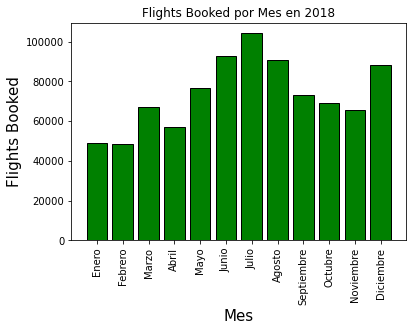

In [93]:
# Creo un gráfico de barras para el 2018
plt.bar(df_2018['Month'], df_2018['Flights Booked'], color="green", edgecolor="black")

# Añado las etiquetas del eje x y el y, título del gráfico y colores 
plt.xlabel('Mes', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Flights Booked', fontsize=15)
plt.title('Flights Booked por Mes en 2018')

# Mostrar el gráfico
plt.show()

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

## BOSPLOT o *Diagrama de cajas*

Voy a intentar SUPERPONER los dos gráficos y para ello tengo que hacer alteraciones en el eje x/y
si hago una superposicion tengo que hacer varios cambios que pueden ser los siguientes
- 1. voy a poner una caja al lado de la otra 2017= azul y 2018 = green por lo que tendré que generar una leyenda
he buscado en internet y sin subplot pt.figure() y dentro del parenteis pongo el tamaño de las letras este método
nos hace una leyenda con los colores y los años 
- 2. El ancho de las columnas(barras) tengo que variarlas ire probando hasta dar con el tamaño y 
según los apuntes es width
- 3. La estructura del eje x por lo que voy a usar el método de creación de array (estructura de datos) y crearemos un elemento único en la columna "moth"
del dataframe del 2017 (por ejemplo) y usaremos según los apunte np.arange y crearemos la varible mes.
- 4. Eje X : Lo he buscado y por lo visto para decir la barra que está a la izq (-) o a la derecha (+) y para determinar la variable del eje x es variable + width/2 Porque la mitad será para el 2017 y la mitad izq para el 2018 
----> month - width/2 (2017)  month + width/2 (2018)
- 5. Eje Y : En el df2017 (podría ser el otro DataFrame)usamos el método Groupby con la columna "Month" y la columna 'Flights Booked' y los valores de cada año se suman ----> df_2017('Month')['Flights Booked'].sum()
- 6. En las agrupaciones adicionales vamos a informar que el ancho de las dos columnas a comparar sean iguales 
- 7. Tenemos que informar que tenemos datos adicionales label=2017 y label=2018
la sintaxis del boxplot es 

```python
plt.bar(x, y, data=data, widths, hue, labels, boxprops color="blue", edgecolor="black") 
```


 - 8. En plt.xticks a aparte de la (rotation=90) tenemos que decirle las posiciones del eje X
 - 9. Usa plt.legend()
 - 10. Mostrar gráfica plt.show()

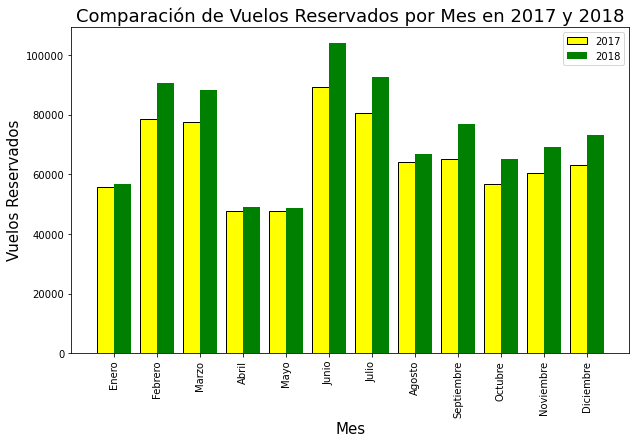

In [94]:
# 1. Crear una figura y pruebo con distintos rangos 
plt.figure(figsize=(10, 6))

# 2. El ancho de las columnas y pruebo con distintos números
width = 0.4 

# 3. La estructura del eje x usamos el array rango y los agrupamos en una estructura única y unidimensional
months = np.arange(len(df_2017['Month'].unique()))

# 7. SINTAXIS DE BOXPLOT Creamos el gráfico de barras para 2017
plt.bar(months - width/2, df_2017.groupby('Month')['Flights Booked'].sum(), width=width, color="yellow",edgecolor="black", label="2017")

# 7. SINTAXIS DE BOXPLOT Creamos el gráfico de barras para 2018
plt.bar(months + width/2, df_2018.groupby('Month')['Flights Booked'].sum(), width=width, color="green", label="2018")

# Añadir etiquetas a los ejes y variamos el título 
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Vuelos Reservados', fontsize=15)
plt.title('Comparación de Vuelos Reservados por Mes en 2017 y 2018', fontsize=18)

# Añadir las etiquetas de los meses en el eje X con una rotación de 90 grados
plt.xticks(months, df_2017['Month'].unique(), rotation=90)

# Añadir leyenda para distinguir ambos años
plt.legend()

# Mostrar el gráfico
plt.show()


In [95]:
df.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

# FASE II:VISUALIZACIÓN
### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
En el EDA ya había echo algunas consultas puesto se veía un patrón entre la Distancia y la acumulación de puntos. 
Vamos a usar las variables 'Distance' 'Points Accumulated' vamos a concretar datos de la exploración que hicimos.


## BOSPLOT o *Diagrama de cajas*


In [96]:
# REVISAR me salen los 3 valores primeros y los 3 ultimos
df['Distance'].unique()

array([1521, 2030, 1200, ..., 1217,  617, 4135])

In [97]:
# REVISAR me salen los 3 valores primeros y los 3 ultimos
df['Points Accumulated'].unique()

array([152.  , 203.  , 120.  , ...,  18.75, 601.  , 626.  ])

In [98]:
# vamos a explorar dos columnas que parecen tener relación
# podemos ver que la distancia del vuelo es el equivalente en puntos y se redondea a los multiplos de 10 mas cercano
# sin embargo por azar he visto que cuando la distancia es 606 son 60 puntos voy a hacer una comprobación si la distancia es mayor a 1000
# si es menor a 1000
# efectivamente en las comprobaciones he podido observar que a partir de 1000 es cuando empiezan a contar 

df[df['Distance'] > 1000][['Distance', 'Points Accumulated']].head(10)


,Distance,Points Accumulated
0,1521,152.0
1,2030,203.0
2,1200,120.0
10,2037,203.0
11,4245,424.0
16,1144,114.0
18,3264,326.0
19,2340,234.0
20,1236,123.0
21,3124,312.0


In [99]:
df[df['Distance'] > 0][['Distance', 'Points Accumulated']].head(10)

,Distance,Points Accumulated
0,1521,152.0
1,2030,203.0
2,1200,120.0
8,606,60.0
10,2037,203.0
11,4245,424.0
16,1144,114.0
18,3264,326.0
19,2340,234.0
20,1236,123.0


In [100]:
df[df['Distance'] < 1000][['Distance', 'Points Accumulated']].head(6)

,Distance,Points Accumulated
8,606,60.0
40,658,65.0
79,346,34.0
89,484,48.0
105,932,93.0
108,840,84.0


In [101]:
# voy a probar como ver la cantidad de distancia con los puntos acumulados y voy hacer un df 
distancia_ptos_acumulados = df.groupby(['Distance'])['Points Accumulated'].sum().reset_index()

# Compruebo los primeros resultados para verificar 
print(distancia_ptos_acumulados.head(24))

    Distance  Points Accumulated
0         90                9.00
1         91               27.72
2         92               18.00
3         94               27.00
4         95               18.72
5         96               18.00
6         97               18.72
7         98               38.25
8         99                9.72
9        100               20.00
10       101               30.00
11       102               42.50
12       103               10.80
13       104               20.00
14       106               30.00
15       107               20.00
16       108               25.00
17       109               10.00
18       110               11.00
19       111               33.00
20       112               11.00
21       115               22.88
22       117               22.00
23       118               33.00


In [110]:
# si uso el metodo ISIN() puedo filtrar filas con las distancias específicas, y revisar el comportamiento
# de los números
#por ejemplo, 500 y 1000
distancias_especificas = distancia_ptos_acumulados[distancia_ptos_acumulados['Distance'].isin([90,91,92,93,94,95,96,97,98, 99])]

# Mostrar los resultados
print(distancias_especificas)

   Distance  Points Accumulated
0        90                9.00
1        91               27.72
2        92               18.00
3        94               27.00
4        95               18.72
5        96               18.00
6        97               18.72
7        98               38.25
8        99                9.72


In [112]:
# si uso el metodo ISIN() puedo filtrar filas con las distancias específicas, y revisar el comportamiento
# de los números
#por ejemplo, 500 y 1000
#df[df['Distance'].isin([6231, 6293])]
distancias_especificas = distancia_ptos_acumulados[distancia_ptos_acumulados['Distance'].isin([90,91,92,93,94,95,96,97,98, 99])]

# Mostrar los resultados
print(distancias_especificas)

   Distance  Points Accumulated
0        90                9.00
1        91               27.72
2        92               18.00
3        94               27.00
4        95               18.72
5        96               18.00
6        97               18.72
7        98               38.25
8        99                9.72


In [119]:

#distancias_especificas = df[df['Distance'].isin([6231, 6293])][['Distance', 'Points Accumulated','Flights Booked',
 #      'Flights with Companions', 'Total Flights']]


distancias_especificas = df[df['Distance'].isin([90,91,92,93,94,95,96,97,98, 99])][['Loyalty Number','Distance', 'Points Accumulated','Year', 'Month']]

# Mostrar los resultados
print(distancias_especificas)

        Loyalty Number  Distance  Points Accumulated  Year  Month
8302            543285        91                9.00  2017      1
18647           194482        94                9.00  2017      2
23607           458614        90                9.00  2017      2
26561           614000        91                9.00  2017      2
26857           628844        97                9.00  2017      2
63085           756646        95                9.00  2017      4
136884          190561        98                9.00  2017      9
173691          349838        92                9.00  2017     11
177513          553453        94                9.00  2017     11
183196          853540        96                9.00  2017     11
212131          596818        92                9.00  2018      1
219718          605761        91                9.72  2018      2
219744          207821        95                9.72  2018      4
219755          378267        97                9.72  2018      2
219917    

In [118]:

#distancias_especificas = df[df['Distance'].isin([6231, 6293])][['Distance', 'Points Accumulated','Flights Booked',
 #      'Flights with Companions', 'Total Flights']]


distancias_especificas = df[df['Distance'].isin([90,91,92,93,94,95,96,97,98, 99])][['Loyalty Number','Distance', 'Points Accumulated','Points Redeemed']]

# Mostrar los resultados
print(distancias_especificas)

        Loyalty Number  Distance  Points Accumulated  Points Redeemed
8302            543285        91                9.00                0
18647           194482        94                9.00                0
23607           458614        90                9.00                0
26561           614000        91                9.00                0
26857           628844        97                9.00                0
63085           756646        95                9.00                0
136884          190561        98                9.00                0
173691          349838        92                9.00                0
177513          553453        94                9.00                0
183196          853540        96                9.00                0
212131          596818        92                9.00                0
219718          605761        91                9.72                0
219744          207821        95                9.72                0
219755          3782

In [121]:
distancias_especificas = df[df['Distance'].isin([95,97,98])][['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']]

# Mostrar los resultados
print(distancias_especificas)

        Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
26857           628844  2017      2               1                        0   
63085           756646  2017      4               1                        0   
136884          190561  2017      9               1                        0   
219744          207821  2018      4               1                        0   
219755          378267  2018      2               1                        0   
219917          595658  2018      4               1                        0   
351877          835973  2018      9               1                        0   
372205          120554  2018     11               1                        0   

        Total Flights  Distance  Points Accumulated  Points Redeemed  \
26857               1        97                9.00                0   
63085               1        95                9.00                0   
136884              1        98                9.00            

In [125]:
distancias_especificas = df[df['Month'].isin([4])][['Loyalty Number', 'Year','Distance','Points Accumulated']]

# Mostrar los resultados
print(distancias_especificas)

        Loyalty Number  Year  Distance  Points Accumulated
272             892022  2017      4080              408.00
303             101709  2017      3255              325.00
441             486200  2018      3792              409.32
448             567420  2018      3792              409.32
479             101709  2018      2249              336.00
...                ...   ...       ...                 ...
405138          999788  2017      2717              271.00
405234          116703  2018       402               43.20
405380          543862  2017      1008              100.00
405427          602574  2017       704               70.00
405580          473410  2018       882               95.04

[16852 rows x 4 columns]


In [ ]:
# por lo que puedo ver en el mes 4 cambian los puntos acumulados según la distancia
# voy a comprobar que hay una variación entre los km y los puntos acumulados
# y hemos podido observar que esto ocurre solo en el 2018 
# No voy a usar las hipotesis voy a usar el código y como un año sólo tiene 12 meses voy hacer la prueba 12 veces en el 2017
# y 12 veces en el 2018 y con los resultados saco conclusiones para poder hacer la gráfica
# haciendo esto sin la formulación de hipotesis que sería mas sencillo puedo deducir
# que en el 2018 parece encontrarse una promocion en los meses 2,3,4 que según pudimos ver eran en los que menos vuelos
# se realizaban en el 2017. Entendemos que durante el 2018 se realiza una promoción en los meses 2,3,4 ya que 
# encuentro una variación en la media de puntos comparando los meses 
# pego el código que he usado 

In [159]:
# 2018 CON PROMOCIÓN Y MISMOS RESULTADOS QUE AQUI MES: 2,3,4
# Voy a filtrar por año 2018 y por mes 4 (posible promoción)
# Esto lo he hecho con todos los meses del 2018 por lo que lo he ejecutado 12 veces y he encontrado diferncia en 3 meses
# mes 2,3,4,
mes_promo = df[(df['Year'] == 2018) & (df['Month'] == 4)][['Loyalty Number', 'Distance', 'Points Accumulated']]

otros_meses_no_promo = df[(df['Year'] == 2018) & (df['Month'] != 4)][['Loyalty Number', 'Distance', 'Points Accumulated']]

# comparar la relacion entre distancia y puntos acumulados en los dos data anteriores
mes_promo['Points per Mile'] = mes_promo['Points Accumulated'] / mes_promo['Distance']
otros_meses_no_promo['Points per Mile'] = otros_meses_no_promo['Points Accumulated'] / otros_meses_no_promo['Distance']

# Calcular la media de puntos acumulados por milla en ambos casos
promo_points_media = mes_promo['Points per Mile'].mean()
otros_points_media = otros_meses_no_promo['Points per Mile'].mean()

# Imprimeme los resultados 
print(f"Media de puntos acumulados por km en el mes 4 del 2018 (promoción): {promo_points_media}")
print(f"Media de puntos acumulados por km en otros meses del 2018: {otros_points_media}")

Media de puntos acumulados por km en el mes 4 del 2018 (promoción): 0.12217740413563588
Media de puntos acumulados por km en otros meses del 2018: 0.10363594830115855


In [160]:
# 2018 SIN PROMOCIÓN Y MISMOS RESULTADOS QUE AQUI MES: 1,5,6,7,8,9,10,11,12
# Voy a filtrar por año 2018 y por mes 8 (sin promoción)
# Esto lo he hecho con todos los meses del 2018 por lo que lo he ejecutado 12 veces y he encontrado diferncia en 3 meses
# mes 2,3,4,
mes_promo = df[(df['Year'] == 2018) & (df['Month'] == 8)][['Loyalty Number', 'Distance', 'Points Accumulated']]

otros_meses_no_promo = df[(df['Year'] == 2018) & (df['Month'] != 8)][['Loyalty Number', 'Distance', 'Points Accumulated']]

# comparar la relacion entre distancia y puntos acumulados en los dos data anteriores
mes_promo['Points per Mile'] = mes_promo['Points Accumulated'] / mes_promo['Distance']
otros_meses_no_promo['Points per Mile'] = otros_meses_no_promo['Points Accumulated'] / otros_meses_no_promo['Distance']

# Calcular la media de puntos acumulados por milla en ambos casos
promo_points_media = mes_promo['Points per Mile'].mean()
otros_points_media = otros_meses_no_promo['Points per Mile'].mean()


# Imprimeme los resultados 
print(f"Media de puntos acumulados por km en el mes 8 del 2018 (promoción): {promo_points_media}")
print(f"Media de puntos acumulados por km en otros meses del 2018: {otros_points_media}")

Media de puntos acumulados por km en el mes 8 del 2018 (promoción): 0.09981351951384067
Media de puntos acumulados por km en otros meses del 2018: 0.10563258386495802


#######################################

In [184]:
df = pd.read_csv("Customer Flight Activity.csv")
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'Customer Flight Activity.csv'

In [183]:
# Agrupar los datos por año, mes y distancia
cliente_puntos_año_mes = df.groupby(['Year', 'Month', 'Distance'])['Points Accumulated'].sum().reset_index()

# Mostrar los primeros 10 resultados para verificar
print(cliente_puntos_año_mes.head(10))


Empty DataFrame
Columns: [Year, Month, Distance, Points Accumulated]
Index: []


In [181]:
# voy a probar como ver la cantidad de vuelos reservados por año y por mes 
distancia_puntos_año_mes = df.groupby(['Year','Month'])['Points Accumulated'].sum().reset_index()

# Compruebo los primeros resultados para verificar 
print(distancia_puntos_año_mes.head(24))

Empty DataFrame
Columns: [Year, Month, Loyalty Number]
Index: []


In [ ]:
distancia_puntos_por_id = df.groupby (['Year','Month'])[ 'Points Accumulated'].sum().reset_index()
print(distancia_puntos_por_id.head(24))

In [ ]:
# voy a probar como ver la cantidad de vuelos reservados por año y por mes 
reservas_por_año_al_mes = df.groupby(['Year','Month'])['Flights Booked'].sum().reset_index()

# Compruebo los primeros resultados para verificar 
print(reservas_por_año_al_mes.head(24))

In [ ]:
#['Loyalty Number', 'Year', 'Month', 'Flights Booked',
#    'Flights with Companions', 'Total Flights', 'Distance',
#   'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],

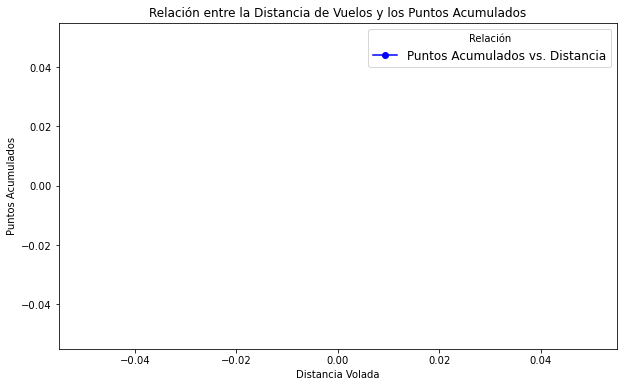

In [176]:
# Crear una tabla de resumen de la distancia y puntos acumulados (puede ser la media por distancia, por ejemplo)
tabla_resumen = df.groupby('Distance')['Points Accumulated'].mean()

# Graficar la relación entre la distancia volada y los puntos acumulados
plt.figure(figsize=(10, 6))
plt.plot(tabla_resumen.index, tabla_resumen.values, marker='o', color='b', label='Puntos Acumulados vs. Distancia')

# Añadir títulos y etiquetas
plt.title('Relación entre la Distancia de Vuelos y los Puntos Acumulados')
plt.xlabel('Distancia Volada')
plt.ylabel('Puntos Acumulados')
plt.legend(title='Relación', fontsize=12)

# Mostrar el gráfico
plt.show()


In [ ]:
# Graficar la tabla resumen con líneas para cada año
plt.figure(figsize=(10, 6))
for year in tabla_para_comparar.index:
    plt.plot(tabla_para_comparar.columns, tabla_para_comparar.loc[year], marker='o', label=str(year))

# Añadir títulos y etiquetas
plt.title('Tendencia de Flights Booked por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Flights Booked')
# esto lo he buscado porque no sabia como meterlo en la gráfica
plt.legend(title='Año',fontsize=15)

# Mostrar el gráfico
plt.show()

In [168]:
# vamos a transformar los meses en una variable categorica por lo que los numeros los vamos a transformar 
#en el nombre de los meses
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

# aplicamos el método de mapeo 
df['Month'] = df['Month'].map(meses)

# imprimir los cambios
print(df[['Month']].head(12))

         Month
0        Enero
1        Enero
2        Enero
8        Enero
10       Enero
11  Septiembre
16       Enero
18       Enero
19       Enero
20       Enero
21       Enero
22       Enero


In [ ]:
dis_2017 = distancia_ptos_acumulados [distancia_ptos_acumulados [['Year'] == 2017][['Distance', 'Points Accumulated','Month']]]
dis_2018 = distancia_ptos_acumulados [distancia_ptos_acumulados [['Year'] == 2018][['Distance', 'Points Accumulated','Month']]]

In [ ]:
df[df['Distance'] > 1000][['Distance', 'Points Accumulated']].head(10)

In [ ]:
distancias_especificas = df[df['Month'].isin([4])][['Loyalty Number', 'Year','Distance','Points Accumulated']]

# Mostrar los resultados
print(distancias_especificas)

In [ ]:
dis_2017 = distancia_ptos_acumulados[distancia_ptos_acumulados['Year'] == 2017]
dis_2018 = distancia_ptos_acumulados[distancia_ptos_acumulados['Year'] == 2018]

In [ ]:
# Crear un conjunto de datos para el 2017 y otro para el 2018
df_2017 = reservas_por_año_al_mes[reservas_por_año_al_mes['Year'] == 2017]
df_2018 = reservas_por_año_al_mes[reservas_por_año_al_mes['Year'] == 2018]

In [ ]:
# voy a usar un Barplot que muestra la relación entre una variable categórica y una variable númerica mediante barras
# para que quede más clara la visualización voy a transformar la columna "Month" en una variable "objet" al numero le voy 
# añadir el nombre correspondiente usare un diccionario
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
# vamos a transformar (mapear)los numeros en nombre de los meses 
df_2017['Month'] = df_2017['Month'].map (meses)
df_2018['Month'] = df_2018['Month'].map (meses)

In [126]:
distancias_especificas = df[df['Month'].isin([5])][['Loyalty Number', 'Year','Distance','Points Accumulated']]

# Mostrar los resultados
print(distancias_especificas)

        Loyalty Number  Year  Distance  Points Accumulated
166             572345  2018      4769               476.0
337             101709  2017      3234               323.0
748             466795  2017      3840               384.0
773             717250  2018      3840               384.0
782             101876  2018      3288               328.0
...                ...   ...       ...                 ...
405000          188828  2017       292                29.0
405323          716393  2017       402                40.0
405408          513778  2017      1197               119.0
405416          810990  2018      1197               119.0
405544          746402  2018       832                83.0

[17017 rows x 4 columns]


In [ ]:
'Points Redeemed', 'Dollar Cost Points Redeemed'

In [102]:
# Filtrar los registros donde "Points Accumulated" es mayor a 64 en el nuevo DataFrame
distancia_ptos_acumulados_filtrado = distancia_ptos_acumulados[distancia_ptos_acumulados['Points Accumulated'] > 64]

# Mostrar los registros filtrados
print(distancia_ptos_acumulados_filtrado)


      Distance  Points Accumulated
28         126               69.00
46         154               79.95
47         156               91.20
49         158               75.00
51         160              165.28
...        ...                 ...
4740      6210              621.00
4741      6231             1246.00
4742      6240              624.00
4743      6262              626.00
4744      6293             1258.00

[4650 rows x 2 columns]


In [106]:
# Filtrar filas con las distancias específicas, por ejemplo, 500 y 1000
distancias_especificas = distancia_ptos_acumulados[distancia_ptos_acumulados['Distance'].isin([6231, 6293])]

# Mostrar los resultados
print(distancias_especificas)

      Distance  Points Accumulated
4741      6231              1246.0
4744      6293              1258.0


In [107]:
# Filtrar filas con las distancias específicas, por ejemplo, 500 y 1000
distancias_especificas = df[df['Distance'].isin([6231, 6293])][['Distance', 'Points Accumulated','Flights Booked',
       'Flights with Companions', 'Total Flights']]

# Mostrar los resultados
print(distancias_especificas)

        Distance  Points Accumulated  Flights Booked  Flights with Companions  \
109089      6231               623.0              20                       11   
113306      6293               629.0              20                       11   
114816      6231               623.0              20                       11   
315678      6293               629.0              20                       11   

        Total Flights  
109089             31  
113306             31  
114816             31  
315678             31  


In [ ]:
df[df['Distance'] > 0][['Distance', 'Points Accumulated']].head(10)

In [103]:
# Filtrar los registros donde "Points Accumulated" es mayor a 0
distancia_ptos_acumulados = df.groupby(['Distance'])['Points Accumulated'].sum().reset_index()
distancia_ptos_acumulados_filtrado = df[df['Points Accumulated'] > 64]

# Mostrar los registros
distancia_ptos_acumulados_filtrado

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
10,100550,2017,1,3,0,3,2037,203.0,0,0
11,863070,2017,9,8,7,15,4245,424.0,341,28
...,...,...,...,...,...,...,...,...,...,...
405612,999550,2018,12,15,0,15,2985,298.0,0,0
405613,999589,2018,12,14,0,14,4690,469.0,0,0
405614,999631,2018,12,11,1,12,2244,224.0,0,0
405616,999758,2018,12,1,0,1,896,89.0,0,0


In [104]:
# Filtrar filas con las distancias específicas, por ejemplo, 500 y 1000
distancias_especificas = distancia_ptos_acumulados[distancia_ptos_acumulados['Distance'].isin([6231, 6293])]

# Mostrar los resultados
print(distancias_especificas)


      Distance  Points Accumulated
4741      6231              1246.0
4744      6293              1258.0


In [ ]:
# Filtrar los registros donde "Points Accumulated" es mayor a 64
distancia_ptos_acumulados_filtrado = df[df['Points Accumulated'] > 64][['Distance', 'Points Accumulated']]

# Mostrar los registros filtrados
print(distancia_ptos_acumulados_filtrado)

In [ ]:
# Filtrar los registros donde "Points Accumulated" es mayor a 0
distancia_ptos_cumulados = df.groupby(['Distance'])['Points Accumulated'].sum().reset_index()
distancia_ptos_cumulados_filtrado = df[df['Points Accumulated'] > 64]

# Encontrar el valor mínimo de "Points Accumulated" en este subconjunto
min_puntos = distancia_ptos_cumulados_filtrado['Points Accumulated'].min()

# Filtrar los registros que tienen ese valor mínimo
min_points_imprime = distancia_ptos_cumulados_filtrado[distancia_ptos_cumulados_filtrado['Points Accumulated'] == min_puntos]

# Mostrar los registros
min_points_imprime

In [ ]:
# voy a revisar este df por rangos 
#distancia_ptos_cumulados= df[df['Distance'] < 1000][['Distance', 'Points Accumulated']].head(6)

In [ ]:
# Filtrar los registros donde "Points Accumulated" es mayor a 0
df_filtered = df[df['Points Accumulated'] > 64]

# Encontrar el valor mínimo de "Points Accumulated" en este subconjunto
min_points = df_filtered['Points Accumulated'].min()

# Filtrar los registros que tienen ese valor mínimo
min_points_records = df_filtered[df_filtered['Points Accumulated'] == min_points]

# Mostrar los registros
min_points_records

In [ ]:
#NO VALEEEEE

# voy a probar como ver la cantidad de distancia con los puntos acumulados y voy hacer un df 
distancia_ptos_cumulados = df.groupby(['Distance'])['Points Accumulated'].sum().reset_index()
distancia_ptos_cumulados= df[df.groupby(['Distance'])['Points Accumulated'].sum().reset_index() < [0,499][['Distance', 'Points Accumulated']]].head(6)

# Compruebo los primeros resultados para verificar 
print(distancia_ptos_cumulados.head(24))

In [62]:
## REVISAR ESTO SON NOTAS 

# Filtrar los registros donde "Points Accumulated" es mayor a 0
df_filtered = df[df['Points Accumulated'] > 64]

# Encontrar el valor mínimo de "Points Accumulated" en este subconjunto
min_points = df_filtered['Points Accumulated'].min()

# Filtrar los registros que tienen ese valor mínimo
min_points_records = df_filtered[df_filtered['Points Accumulated'] == min_points]

# Mostrar los registros
min_points_records

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
220873,661451,2018,2,3,3,6,432,64.5,0,0
221010,874780,2018,4,4,2,6,432,64.5,0,0
221089,566182,2018,2,6,0,6,438,64.5,0,0
222731,822555,2018,2,5,0,5,435,64.5,0,0
224116,419748,2018,2,4,0,4,432,64.5,0,0
224222,394979,2018,3,4,0,4,436,64.5,0,0
225734,746677,2018,4,3,0,3,432,64.5,0,0
225801,545534,2018,3,3,0,3,435,64.5,0,0
364784,910492,2018,2,2,2,4,432,64.5,434,35
384967,829505,2018,3,1,1,2,436,64.5,659,53


In [70]:
# Crear rangos para la columna 'Distance'
bins = [0, 99, 499, 999, 2000]
labels = ['0-99', '100-499', '500-999', '1000-2000']

# Asignar cada distancia a un rango
df['Distance Range'] = pd.cut(df['Distance'], bins=bins, labels=labels, right=False)

# Agrupar por el rango de distancia y sumar los puntos acumulados
distancia_ptos_cumulados = df.groupby('Distance Range')['Points Accumulated'].sum().reset_index()

# Ver los primeros resultados
print(distancia_ptos_cumulados.head())


  Distance Range  Points Accumulated
0           0-99              175.41
1        100-499           195896.25
2        500-999          1610231.03
3      1000-2000          9330896.33


In [67]:
## REVISAR ESTO SON NOTAS 

# Filtrar los registros donde "Points Accumulated" es mayor a 0
df_filtered = df[df['Points Accumulated'] > 2]

# Encontrar el valor mínimo de "Points Accumulated" en este subconjunto
min_points = df_filtered['Points Accumulated'].min()

# Filtrar los registros que tienen ese valor mínimo
min_points_records = df_filtered[df_filtered['Points Accumulated'] == min_points]

# Mostrar los registros
min_points_records

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
8302,543285,2017,1,1,0,1,91,9.0,0,0
18647,194482,2017,2,1,0,1,94,9.0,0,0
23607,458614,2017,2,1,0,1,90,9.0,0,0
26561,614000,2017,2,1,0,1,91,9.0,0,0
26857,628844,2017,2,1,0,1,97,9.0,0,0
63085,756646,2017,4,1,0,1,95,9.0,0,0
136884,190561,2017,9,1,0,1,98,9.0,0,0
173691,349838,2017,11,1,0,1,92,9.0,0,0
177513,553453,2017,11,1,0,1,94,9.0,0,0
183196,853540,2017,11,1,0,1,96,9.0,0,0


In [64]:
# Filtrar los registros donde "Points Accumulated" es mayor a 0
df_filtered = df[df['Points Accumulated'] < 1]

# Encontrar el valor mínimo de "Points Accumulated" en este subconjunto
max_points = df_filtered['Points Accumulated'].max()

# Filtrar los registros que tienen ese valor mínimo
max_points_records = df_filtered[df_filtered['Points Accumulated'] == max_points]

# Mostrar los registros
max_points_records

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
